In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [21]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [23]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [24]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [25]:
df.rename(columns={'Sleep Disorder':'Sleep_Disorder',},inplace=True)

In [26]:
sleep_disorder_counts=df['Sleep_Disorder'].value_counts()
print(sleep_disorder_counts)

Sleep_Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [27]:
df.Gender.value_counts()

,count
Gender,
Male,189
Female,185


In [28]:
df.Age.value_counts()

,count
Age,
43,34
44,30
37,20
38,20
50,20
31,18
32,17
53,17
59,16


In [29]:
df.groupby('Age')['Sleep_Disorder'].value_counts()

Age  Sleep_Disorder
28   Sleep Apnea        2
     Insomnia           1
29   Insomnia           2
     Sleep Apnea        2
30   Insomnia           1
     Sleep Apnea        1
31   Sleep Apnea        1
33   Insomnia           1
34   Sleep Apnea        2
35   Sleep Apnea        1
36   Insomnia           2
     Sleep Apnea        2
38   Sleep Apnea        2
39   Insomnia           2
41   Insomnia           1
42   Sleep Apnea        2
     Insomnia           1
43   Insomnia          17
     Sleep Apnea        2
44   Insomnia          28
45   Insomnia          11
48   Insomnia           2
     Sleep Apnea        1
49   Sleep Apnea       10
50   Sleep Apnea       17
     Insomnia           1
51   Sleep Apnea        3
52   Insomnia           6
53   Insomnia           1
55   Sleep Apnea        2
57   Sleep Apnea        8
58   Sleep Apnea        6
59   Sleep Apnea       14
Name: count, dtype: int64

In [30]:
df.groupby('Age')['Sleep_Disorder'].value_counts().unstack()

Sleep_Disorder,Insomnia,Sleep Apnea
Age,,
28,1.0,2.0
29,2.0,2.0
30,1.0,1.0
31,NaN,1.0
33,1.0,NaN
34,NaN,2.0
35,NaN,1.0
36,2.0,2.0
38,NaN,2.0


In [31]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep_Disorder'],
      dtype='object')

In [32]:
df.Occupation.value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Scientist,4
Software Engineer,4


In [33]:
df.groupby('Occupation')['Sleep_Disorder'].value_counts()

Occupation            Sleep_Disorder
Accountant            Insomnia           7
Doctor                Sleep Apnea        4
                      Insomnia           3
Engineer              Insomnia           5
                      Sleep Apnea        1
Lawyer                Sleep Apnea        3
                      Insomnia           2
Nurse                 Sleep Apnea       61
                      Insomnia           3
Sales Representative  Sleep Apnea        2
Salesperson           Insomnia          29
                      Sleep Apnea        1
Scientist             Sleep Apnea        2
Software Engineer     Insomnia           1
Teacher               Insomnia          27
                      Sleep Apnea        4
Name: count, dtype: int64

In [34]:
pd.crosstab(df.Occupation,df.Sleep_Disorder)

Sleep_Disorder,Insomnia,Sleep Apnea
Occupation,,
Accountant,7,0
Doctor,3,4
Engineer,5,1
Lawyer,2,3
Nurse,3,61
Sales Representative,0,2
Salesperson,29,1
Scientist,0,2
Software Engineer,1,0


<Axes: xlabel='Gender'>

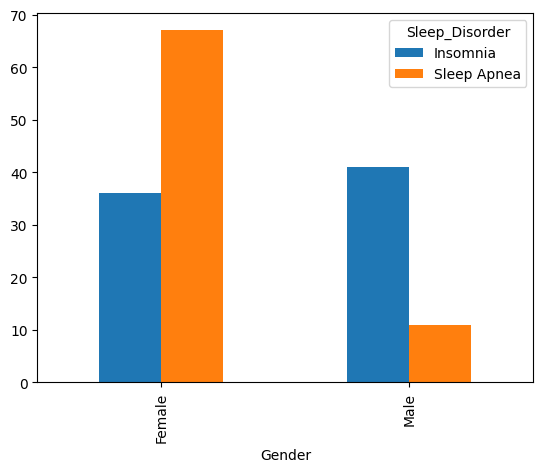

In [35]:
pd.crosstab(df.Gender,df.Sleep_Disorder).plot(kind='bar')

In [36]:
df.rename(columns={'Sleep Duration':'Sleep_Duration',},inplace=True)
df.rename(columns={'BMI Category':'BMI_Category',},inplace=True)
df.rename(columns={'Daily Steps':'Daily_steps',},inplace=True)
df.rename(columns={'Stress Level':'Stress_Level',},inplace=True)

In [37]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep_Duration,Quality of Sleep,Physical Activity Level,Stress_Level,BMI_Category,Blood Pressure,Heart Rate,Daily_steps,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


<Axes: xlabel='BMI_Category'>

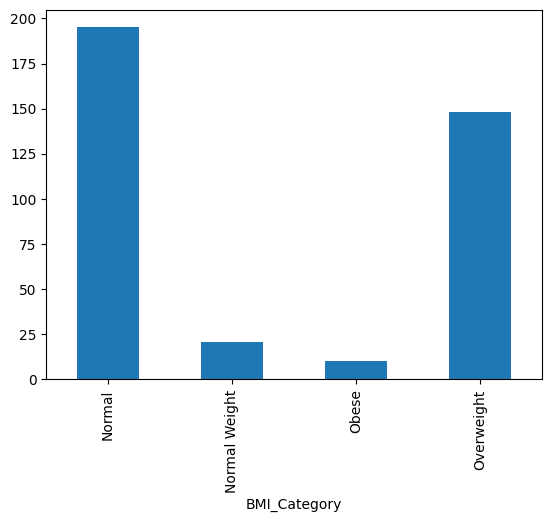

In [38]:
pd.crosstab(df.Age , df.BMI_Category).sum().plot(kind='bar')

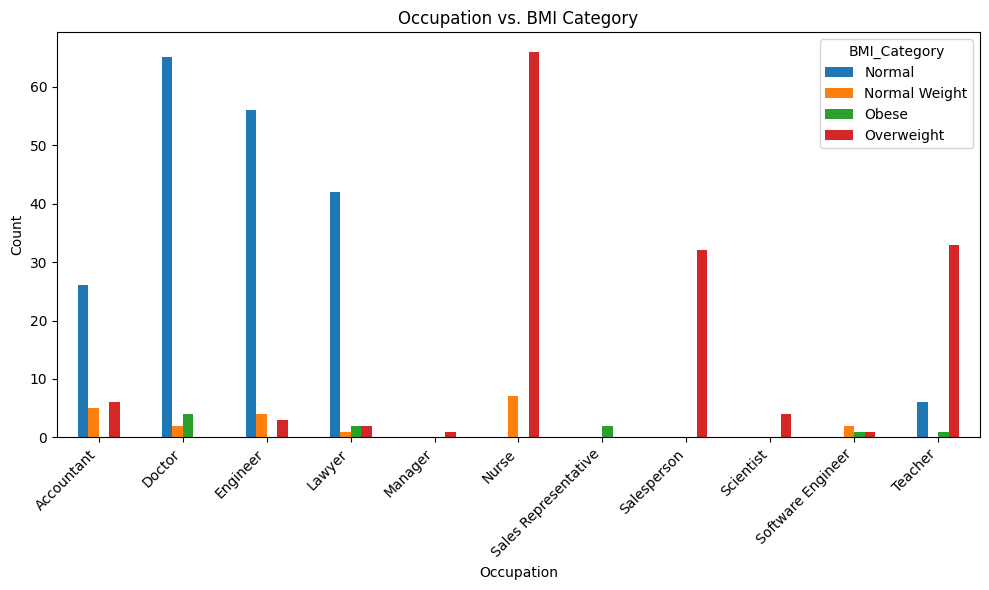

In [39]:


# Create the crosstab
occupation_bmi_crosstab = pd.crosstab(df.Occupation, df.BMI_Category)

# Plot the crosstab
occupation_bmi_crosstab.plot(kind='bar', figsize=(10, 6))  # Adjust figsize as needed
plt.title('Occupation vs. BMI Category')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout() #Adjust layout to prevent labels from overlapping
plt.show()


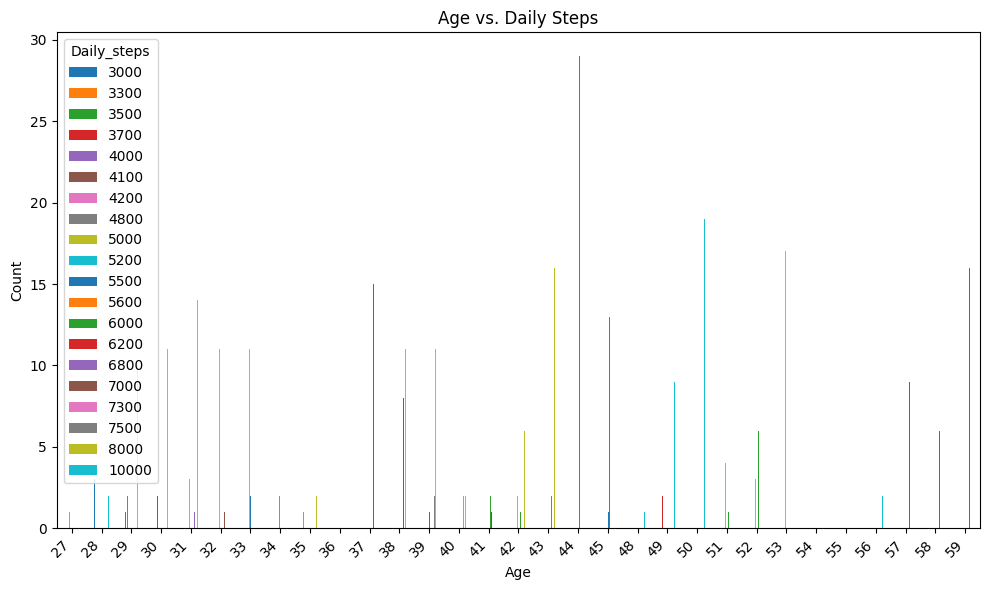

In [40]:
# Create the crosstab
age_dailysteps_crosstab = pd.crosstab(df.Age, df.Daily_steps)

# Plot the crosstab
age_dailysteps_crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Age vs. Daily Steps')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


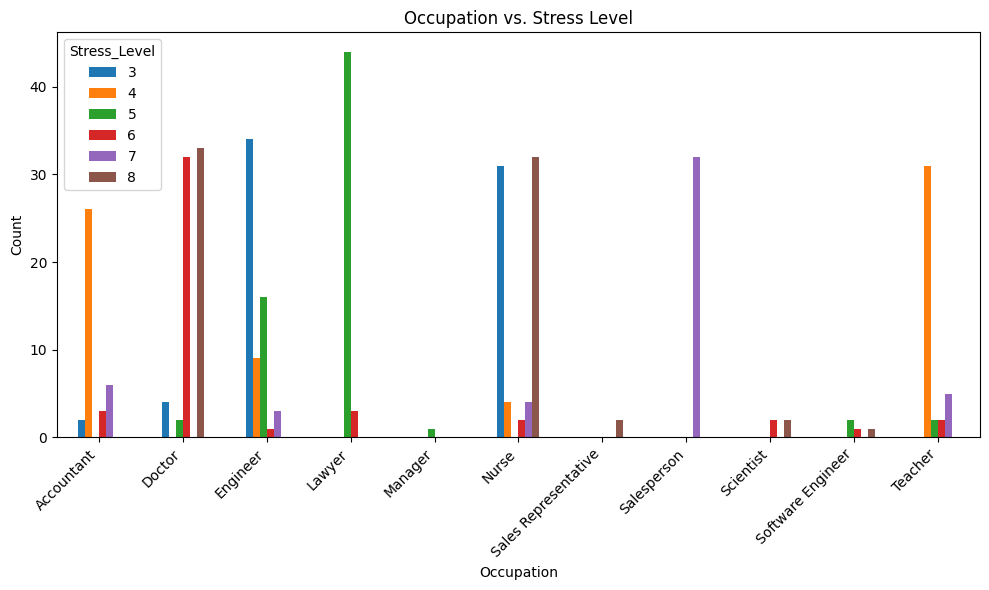

In [41]:
# Create the crosstab
occupation_stresslevel_crosstab = pd.crosstab(df.Occupation, df.Stress_Level)

# Plot the crosstab
occupation_stresslevel_crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Occupation vs. Stress Level')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


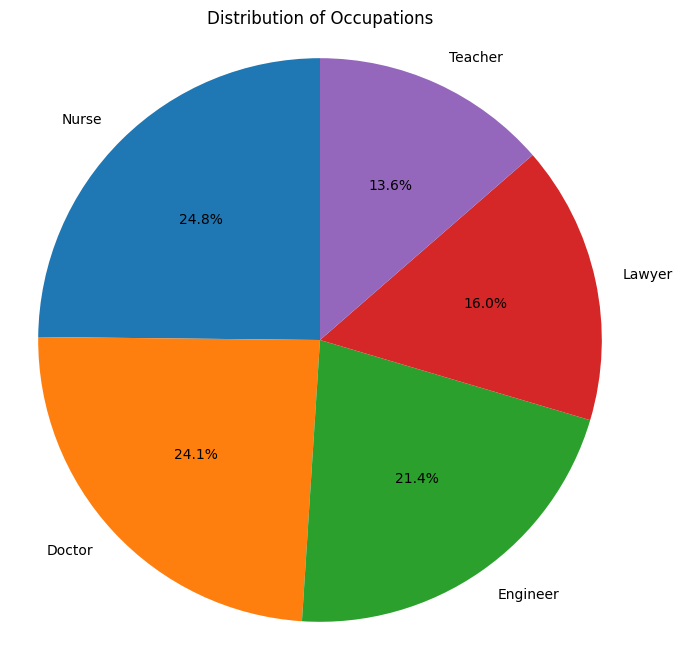

In [42]:
occupation_counts = df['Occupation'].value_counts()

plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(occupation_counts.head(5), labels=occupation_counts.head(5).index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Occupations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.show()


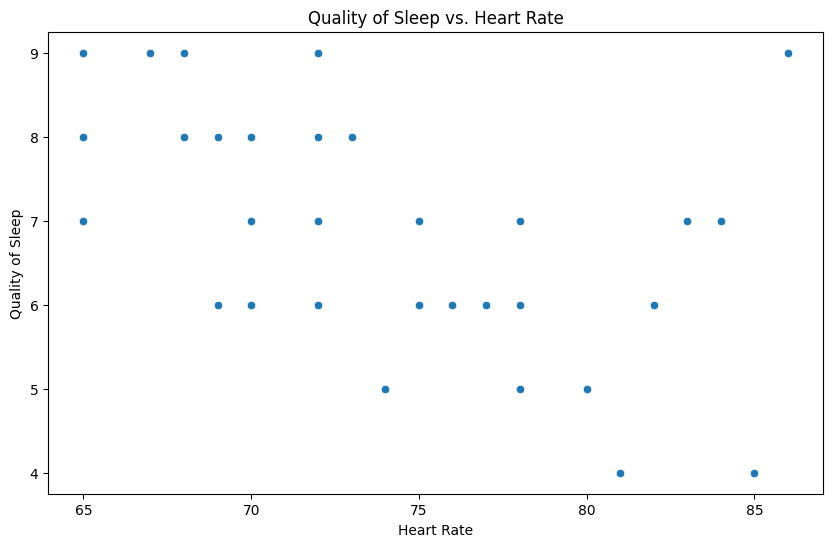

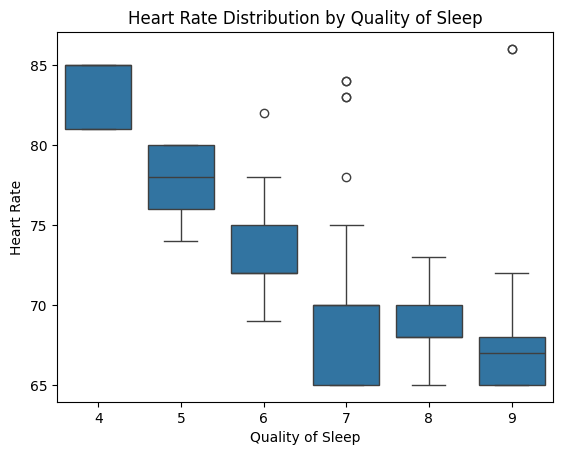

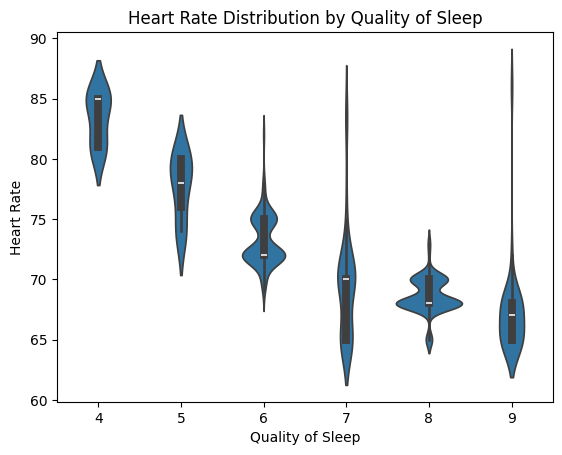

Correlation between Heart Rate and Quality of Sleep: -0.6598647331480084


In [43]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Quality of Sleep', data=df)
plt.title('Quality of Sleep vs. Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Quality of Sleep')
plt.show()

# You can explore the relationship further using other visualizations:

# Box plot:
sns.boxplot(x='Quality of Sleep', y='Heart Rate', data=df)
plt.title('Heart Rate Distribution by Quality of Sleep')
plt.show()


# Violin plot:
sns.violinplot(x='Quality of Sleep', y='Heart Rate', data=df)
plt.title('Heart Rate Distribution by Quality of Sleep')
plt.show()

# Calculate the correlation between the two variables
correlation = df['Heart Rate'].corr(df['Quality of Sleep'])
print(f"Correlation between Heart Rate and Quality of Sleep: {correlation}")


     Blood Pressure  Heart Rate
Age                            
27       126.000000   77.000000
28       134.000000   81.000000
29       123.384615   72.461538
30       121.538462   71.230769
31       120.666667   70.277778
32       123.117647   71.176471
33       125.461538   72.615385
34       131.000000   81.000000
35       124.666667   68.500000
36       117.333333   69.000000
37       118.550000   68.550000
38       124.250000   68.800000
39       128.000000   69.133333
40       124.500000   70.500000
41       128.416667   70.500000
42       130.000000   72.000000
43       129.823529   70.235294
44       131.833333   69.633333
45       134.285714   65.714286
48       141.333333   80.333333
49       139.818182   77.000000
50       139.250000   74.500000
51       130.625000   69.625000
52       128.333333   69.666667
53       125.000000   65.000000
54       125.000000   65.000000
55       140.000000   72.000000
56       118.000000   65.000000
57       140.000000   68.000000
58      

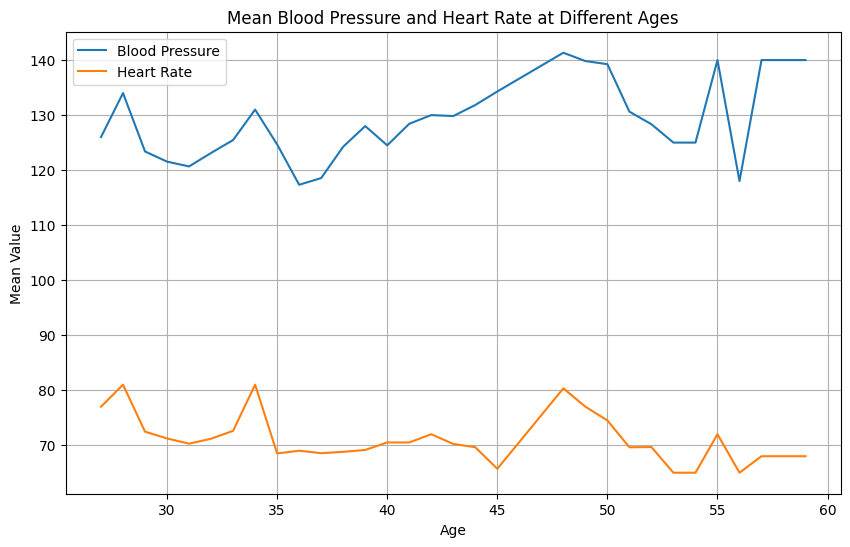

In [48]:
# Convert 'Blood Pressure' to numeric, handling errors
df['Blood Pressure'] = pd.to_numeric(df['Blood Pressure'].str.split('/').str[0], errors='coerce')

mean_values_by_age = df.groupby('Age')[['Blood Pressure', 'Heart Rate']].mean()


# Print the results
print(mean_values_by_age)

# Plotting the mean blood pressure and heart rate against age
plt.figure(figsize=(10, 6))
plt.plot(mean_values_by_age.index, mean_values_by_age['Blood Pressure'], label='Blood Pressure')
plt.plot(mean_values_by_age.index, mean_values_by_age['Heart Rate'], label='Heart Rate')
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.title('Mean Blood Pressure and Heart Rate at Different Ages')
plt.legend()
plt.grid(True)
plt.show()

Age
27    6.100000
28    6.020000
29    6.669231
30    7.569231
31    7.444444
32    6.588235
33    6.061538
34    5.800000
35    7.216667
36    7.066667
37    7.250000
38    7.185000
39    7.240000
40    7.550000
41    7.533333
42    7.433333
43    7.150000
44    6.440000
45    6.621429
48    6.833333
49    6.490909
50    6.155000
51    7.412500
52    7.177778
53    8.423529
54    8.414286
55    8.100000
56    8.200000
57    8.155556
58    8.000000
59    8.093750
Name: Sleep_Duration, dtype: float64


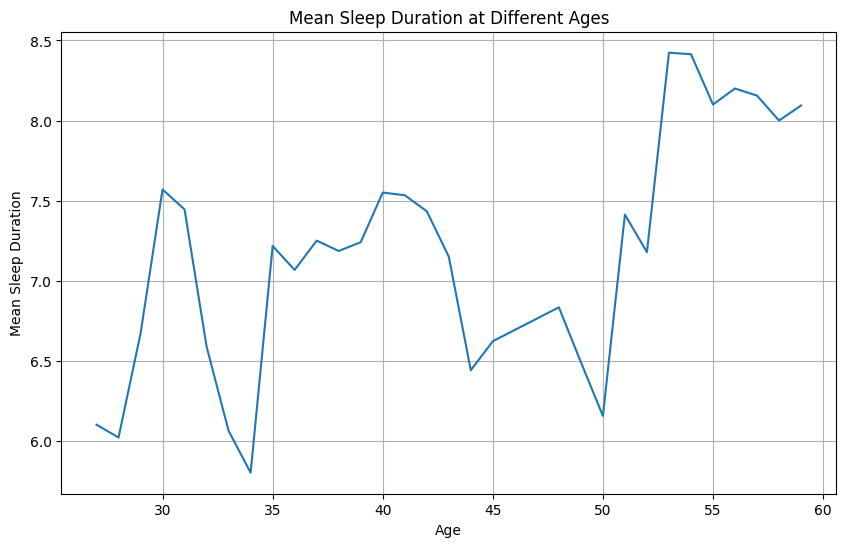

In [49]:
# Calculate the mean sleep duration for each age group
mean_sleep_by_age = df.groupby('Age')['Sleep_Duration'].mean()

# Print the result
print(mean_sleep_by_age)

# Plotting the mean sleep duration against age
plt.figure(figsize=(10, 6))
plt.plot(mean_sleep_by_age.index, mean_sleep_by_age.values)
plt.xlabel('Age')
plt.ylabel('Mean Sleep Duration')
plt.title('Mean Sleep Duration at Different Ages')
plt.grid(True)
plt.show()


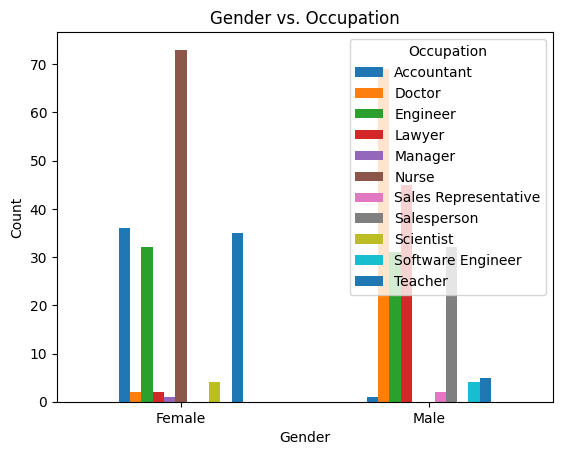

In [50]:
# prompt: gender vs occupation

pd.crosstab(df.Gender,df.Occupation).plot(kind='bar')
plt.title('Gender vs. Occupation')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.show()


In [71]:
df['Sleep_Disorder'] = df['Sleep_Disorder'].fillna(df['Sleep_Disorder'].mode()[0])

In [72]:
##independent feature and dependent feature
X = df.iloc[:,:-1]
Y = df.Sleep_Disorder

In [73]:
X

,Person ID,Age,Sleep_Duration,Quality of Sleep,Physical Activity Level,Stress_Level,Blood Pressure,Heart Rate,Daily_steps
0,1,27,6.1,6,42,6,126,77,4200
1,2,28,6.2,6,60,8,125,75,10000
2,3,28,6.2,6,60,8,125,75,10000
3,4,28,5.9,4,30,8,140,85,3000
4,5,28,5.9,4,30,8,140,85,3000
...,...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,75,3,140,68,7000
370,371,59,8.0,9,75,3,140,68,7000
371,372,59,8.1,9,75,3,140,68,7000
372,373,59,8.1,9,75,3,140,68,7000


In [74]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [75]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # or strategy='mean' if your features are numeric
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [80]:
##decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5735294117647058, 0.9, 'x[8] <= 6100.0\nentropy = 0.722\nsamples = 250\nvalue = [50, 200]'),
 Text(0.3235294117647059, 0.7, 'x[6] <= 128.5\nentropy = 0.992\nsamples = 105\nvalue = [47.0, 58.0]'),
 Text(0.44852941176470584, 0.8, 'True  '),
 Text(0.17647058823529413, 0.5, 'x[2] <= 8.35\nentropy = 0.254\nsamples = 47\nvalue = [2, 45]'),
 Text(0.11764705882352941, 0.3, 'x[0] <= 309.5\nentropy = 0.362\nsamples = 29\nvalue = [2, 27]'),
 Text(0.058823529411764705, 0.1, 'entropy = 0.229\nsamples = 27\nvalue = [1, 26]'),
 Text(0.17647058823529413, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.23529411764705882, 0.3, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.47058823529411764, 0.5, 'x[8] <= 5600.0\nentropy = 0.768\nsamples = 58\nvalue = [45, 13]'),
 Text(0.35294117647058826, 0.3, 'x[5] <= 4.5\nentropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.29411764705882354, 0.1, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4117647058823529, 0.1, 'entropy

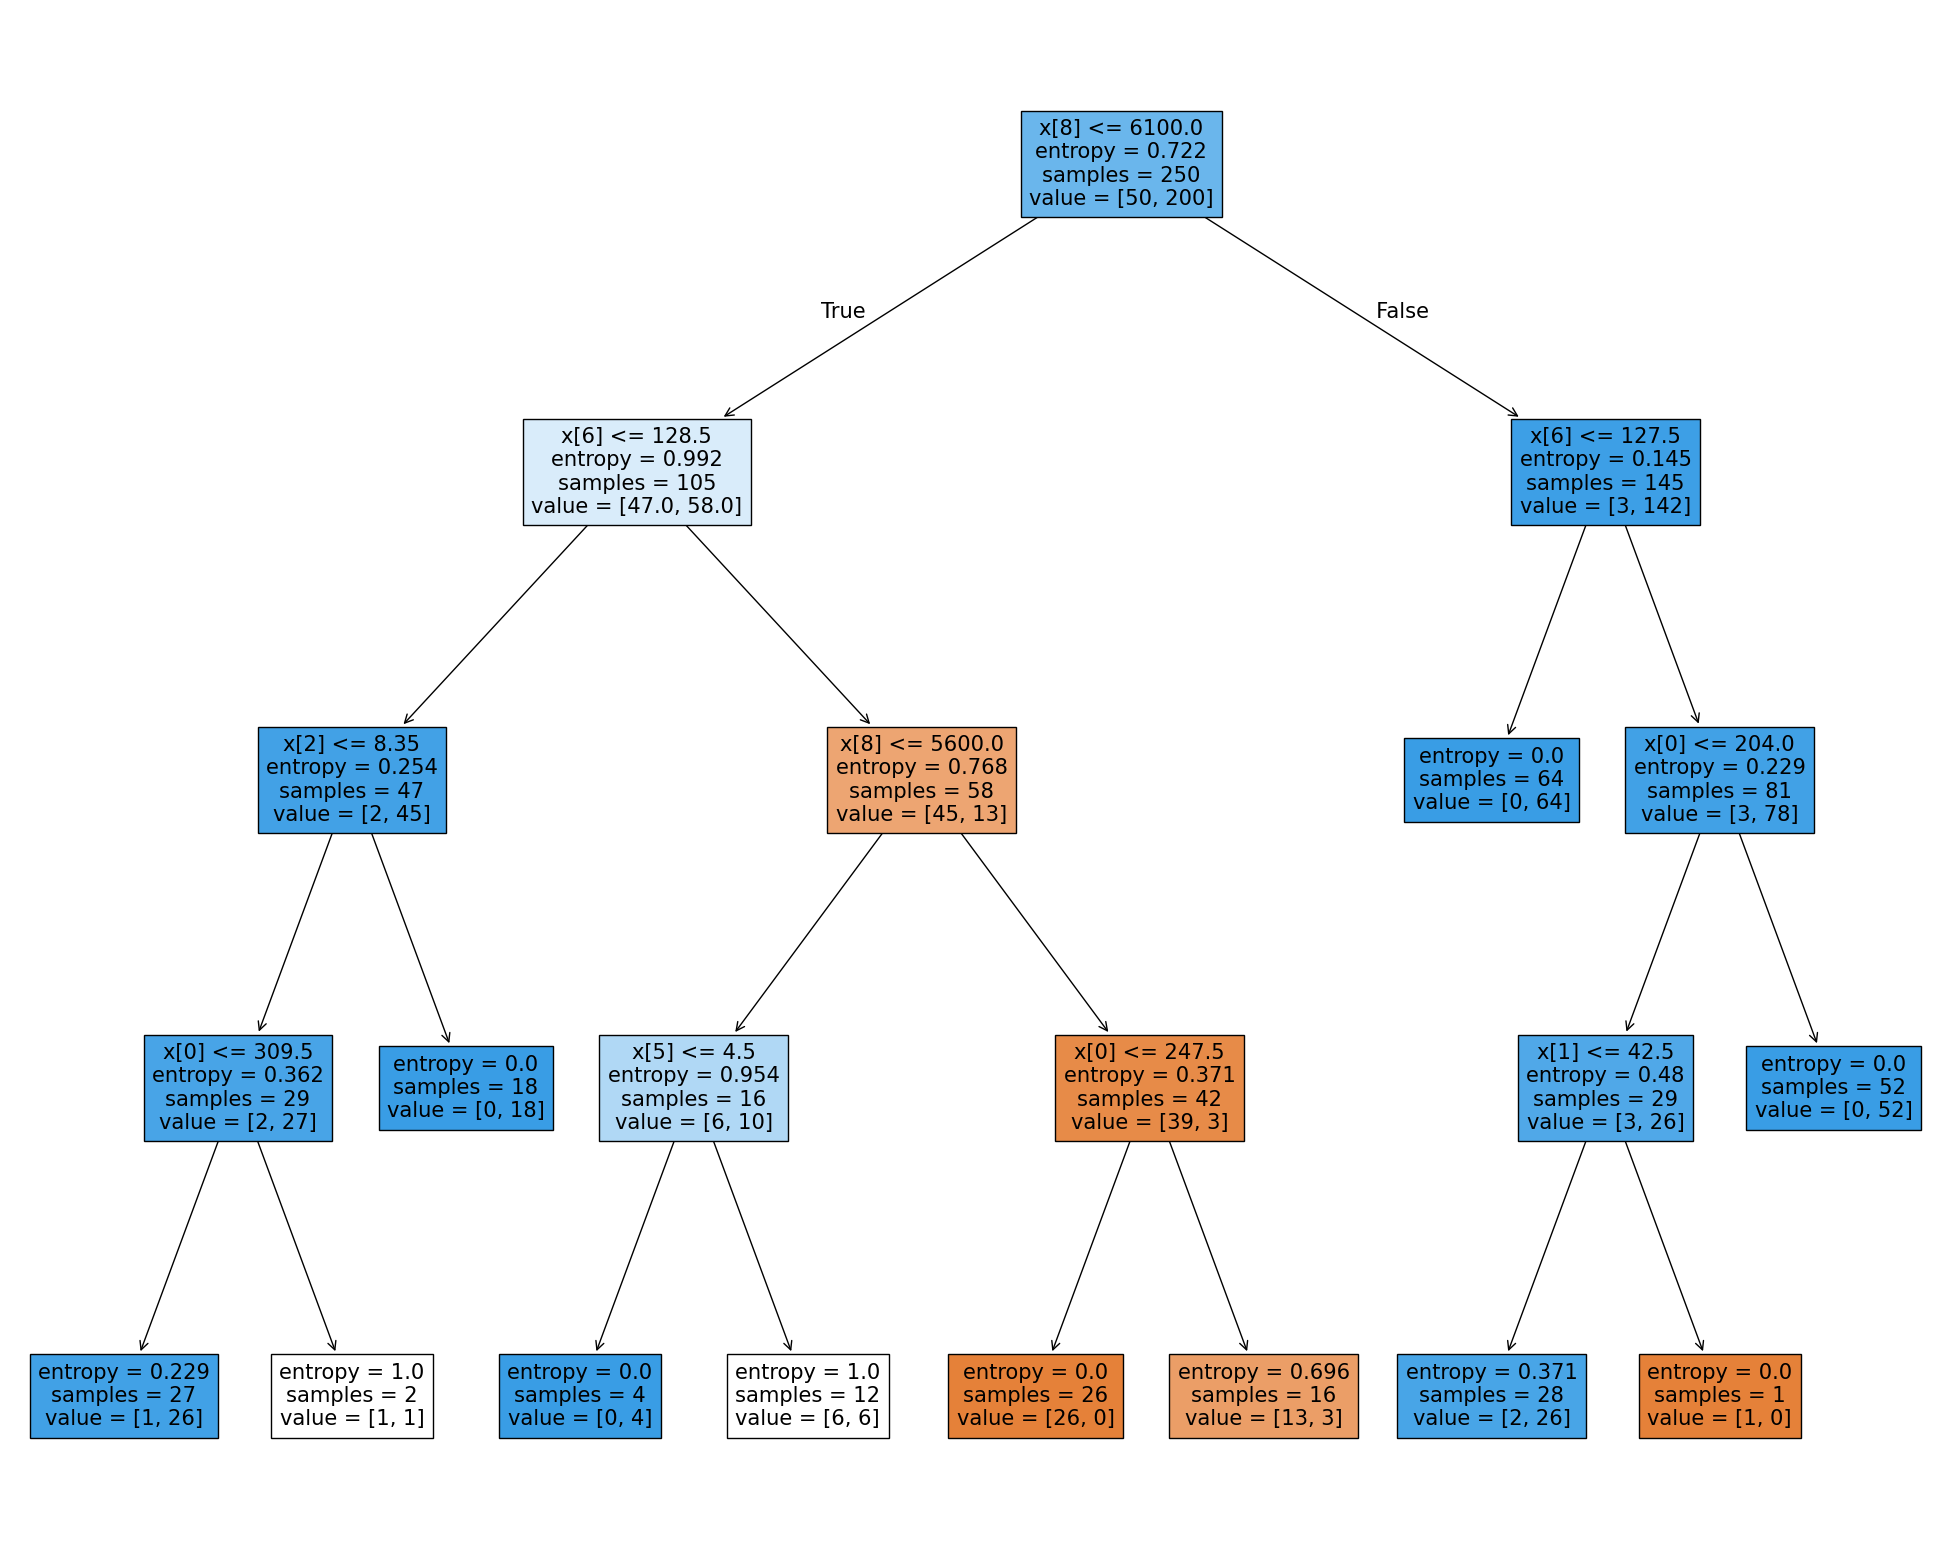

In [81]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(dt,filled=True)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,fbeta_score

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train, Y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
f1_score_rf = f1_score(Y_test, y_pred_rf, average='weighted')
print(f"Random Forest F1 Score: {f1_score_rf}")
fbeta_score_rf = fbeta_score(Y_test, y_pred_rf, beta=0.5, average='weighted')
print(f"Random Forest FBeta Score: {fbeta_score_rf}")
print("Random Forest Classification Report:")
print(classification_report(Y_test,y_pred_rf))

Random Forest Accuracy: 0.9274193548387096
Random Forest F1 Score: 0.9287593667499267
Random Forest FBeta Score: 0.9302377774406496
Random Forest Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.80      0.89      0.84        27
 Sleep Apnea       0.97      0.94      0.95        97

    accuracy                           0.93       124
   macro avg       0.88      0.91      0.90       124
weighted avg       0.93      0.93      0.93       124

